### 1) Binomial Distribution I

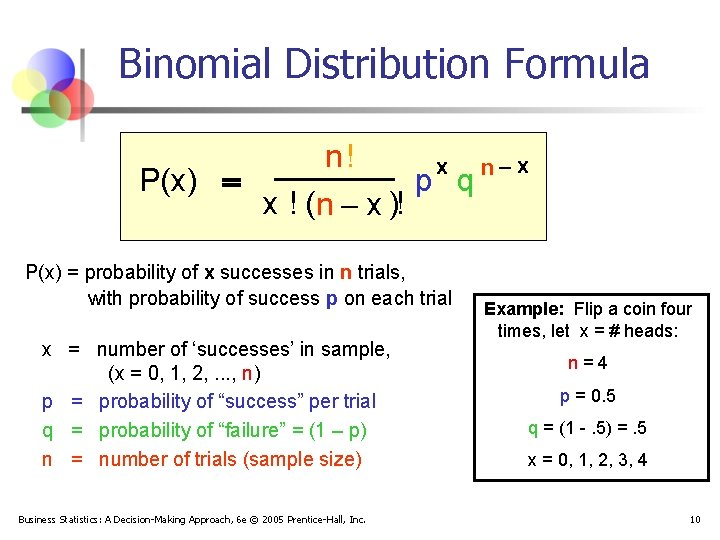

In [1]:
import math

n = 6   # number of trails
x = 3   # number of successes in sample
p = 1.09/(1+1.09)   # probability of being a boy
q = 1-p
answer = 0
for i in range(x):
    answer+=math.factorial(n)/math.factorial(i)/math.factorial(n-i) * p**i*q**(n-i)
    
print('The probability of having exactly x successes out of n trials: ',round(1-answer,3))

The probability of having exactly x successes out of n trials:  0.696


### 2) Binomial Distribution II

In [2]:
import math

n = 10
r = 2
p = 0.12  # probability that a piston is rejected
q = 0.88  # probability of a piston being accepted
answer1 = 0
for i in range(0, 3):
    answer1 += math.factorial(n)/math.factorial(i)/math.factorial(n-i) * p**i *q**(n-i)
    if i == 1:
        answer2 = 1 - answer1

print('The probability that a batch of 10 pistons will contain no more than 2 rejects: ',round(answer1, 3))
print('The probability that a batch of 10 pistons will contain at least 2 rejects: ',round(answer2, 3))

The probability that a batch of 10 pistons will contain no more than 2 rejects:  0.891
The probability that a batch of 10 pistons will contain at least 2 rejects:  0.342


### 3) Normal Distribution I

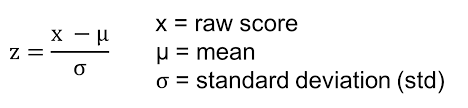

In [3]:
import math


def normal_distribution(x, mean, std):
    return 1/2*(1+math.erf((x-mean) / std / 2**(1/2)))


mean = 20
std = 2

# Less than 19.5 hours
print('The probability that a car can be assembled in less than  19.5 hours: ',round(normal_distribution(19.5, mean, std), 3))
# Between 20 and 22 hours?
print('The probability that a car can be assembled in between 20 to 22 hours: ',round(normal_distribution(22, mean, std) - normal_distribution(20, mean, std), 3))

The probability that a car can be assembled in less than  19.5 hours:  0.401
The probability that a car can be assembled in between 20 to 22 hours:  0.341


### 4) Normal Distribution II

In [4]:
import math


def normal_distribution(x, mean, std):
    return 1/2*(1+math.erf((x-mean) / std / 2**(1/2)))


mean = 70
std = 10


print('The percentage of students having grade > 80: ',round((1 - normal_distribution(80, mean, std))*100, 2))
print('The percentage of students having grade >= 60: ',round((1 - normal_distribution(60, mean, std))*100, 2))
print('The percentage of students having grade < 60: ',round( normal_distribution(60, mean, std)*100, 2))

The percentage of students having grade > 80:  15.87
The percentage of students having grade >= 60:  84.13
The percentage of students having grade < 60:  15.87


### 5) The Central Limit Theorem I

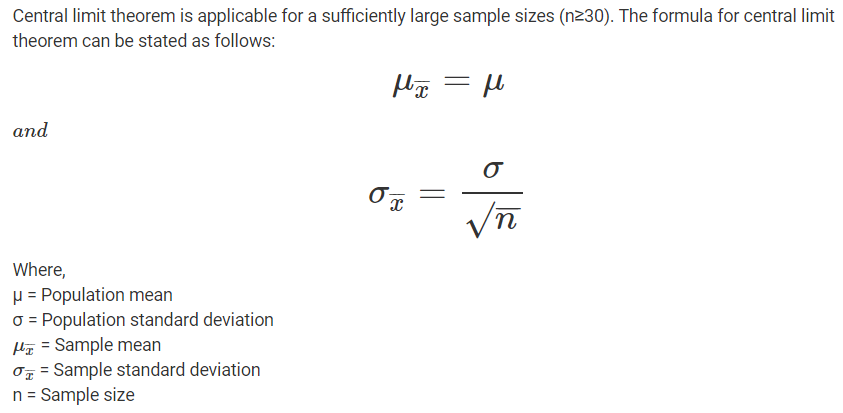

In [5]:
import math


def normal_distribution(x, mean, std):
    return 1/2*(1+math.erf((x-mean) / std / 2**(1/2)))


# inputs
mean = 205
std = 15
n = 49
target = 9800


mean_s = n * mean
std_s = std * n**(1/2)
print('The probability that the elevator can successfully transport all 49 boxes is: \n',round(normal_distribution(target, mean_s, std_s), 4))

The probability that the elevator can successfully transport all 49 boxes is: 
 0.0098


### 6) The Central Limit Theorem II

In [6]:
import math


def normal_distribution(x, mean, std):
    return 1/2*(1+math.erf((x-mean) / std / 2**(1/2)))


# inputs
mean = 205
std = 15
n = 49
target = 9800


mean_s = n * mean
std_s = std * n**(1/2)
print('The probability that 100 students can successfully purchase the remaining 250 ticketsis: \n',round(normal_distribution(target, mean_s, std_s), 4))

The probability that 100 students can successfully purchase the remaining 250 ticketsis: 
 0.0098


### 7) The Central Limit Theorem III

In [7]:
# Compute the interval that covers the middle 95% of the distribution of the sample mean
# i.e P(A<x<B) = 0.95

mean = 500
std = 80
n = 100
z = 1.96

mean = mean
std = std / n**(1/2)

print('Value of A: ',round(mean - std * z, 2))
print('Value of B: ',round(mean + std * z, 2))

Value of A:  484.32
Value of B:  515.68


### 8) Pearson Correlation Coefficient I`

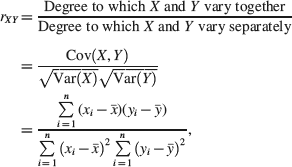

In [8]:
import statistics 

n=int(input())
X=tuple(map(float,input().split()))
Y=tuple(map(float,input().split()))

pcorr=sum([a*b for a,b in zip([i-statistics.mean(X) for i in X],[i-statistics.mean(Y) for i in Y])])/(n*statistics.pstdev(X)*statistics.pstdev(Y))   

print('The value of the Pearson correlation coefficient: ',round(pcorr,3))

10
10 9.8 8 7.8 7.7 7 6 5 4 2
200 44 32 24 22 17 15 12 8 4
The value of the Pearson correlation coefficient:  0.612


### 9) Least Square Regression Line

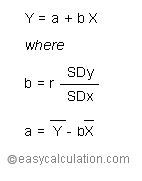

In [9]:
n = 5
XY= [map(int, input().split()) for i in range(n)]
SX, SY, SX2, SXY = map(sum, zip(*[(X, Y, X**2, X * Y) for X, Y in XY]))
b = (n * SXY - SX * SY) / (n * SX2 - SX**2)
a = (SY / n) - b * (SX / n)
print('The value of Y: {:.3f}'.format(a + b * 80))

95 85
85 95
80 70
70 65
60 70
The value of Y: 78.288


### 10) Multiple Linear Regression

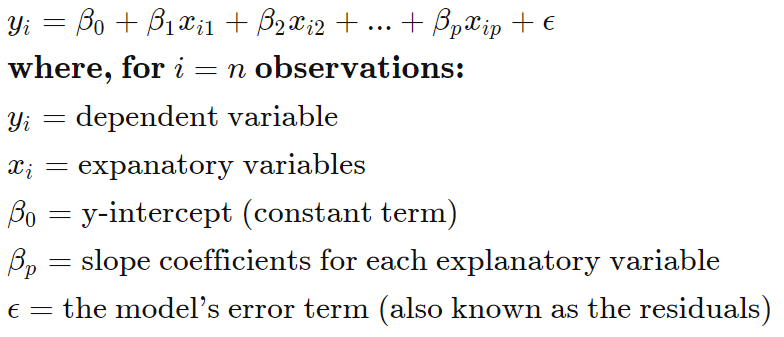

In [12]:
import numpy as np
m,n = [int(i) for i in input().strip().split(' ')]
X = []
Y = []
for i in range(n):
    data = input().strip().split(' ')
    X.append(data[:m])
    Y.append(data[m:])
q = int(input().strip())
X_new = []
for x in range(q):
    X_new.append(input().strip().split(' '))
X = np.array(X,float)
Y = np.array(Y,float)
X_new = np.array(X_new,float)

#center
X_R = X-np.mean(X,axis=0)
Y_R = Y-np.mean(Y)

#calculate beta
beta = np.dot(np.linalg.inv(np.dot(X_R.T,X_R)),np.dot(X_R.T,Y_R))

#predict
X_new_R = X_new-np.mean(X,axis=0)
Y_new_R = np.dot(X_new_R,beta)
Y_new = Y_new_R + np.mean(Y)

#print
for i in Y_new:
    print(f'The value of Y for each value of q is {round(float(i),2)}')

2 7
0.18 0.89 109.85
1.0 0.26 155.72
0.92 0.11 137.66
0.07 0.37 76.17
0.85 0.16 139.75
0.99 0.41 162.6
0.87 0.47 151.77
4
0.49 0.18
0.57 0.83
0.56 0.64
0.76 0.18
The value of Y for each value of q is 105.21
The value of Y for each value of q is 142.67
The value of Y for each value of q is 132.94
The value of Y for each value of q is 129.7
